In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('../input/weatherww2/Summary of Weather.csv')
data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [6]:
weather=data[['MaxTemp','MinTemp']]

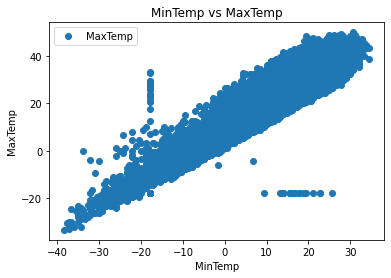

In [7]:
weather.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [8]:
weather.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


<AxesSubplot:>

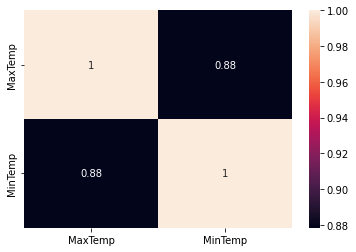

In [9]:
sns.heatmap(weather.corr(),annot=True)

In [10]:
x=weather['MinTemp']
y=weather['MaxTemp']

In [11]:
x=np.array(weather['MinTemp']).reshape(-1,1)
y=np.array(weather['MaxTemp']).reshape(-1,1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=500)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(83328, 1)
(35712, 1)
(83328, 1)
(35712, 1)


# LINEAR REGRESSION

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred_lr=lr.predict(x_test)

In [16]:
print(r2_score(y_test,y_pred_lr))

0.7715703810933143


In [17]:
print(lr.intercept_)
print('*'*20)
print(lr.coef_)

[10.72522896]
********************
[[0.91749487]]


In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lr.flatten()})
df

,Actual,Predicted
0,31.666667,31.623723
1,12.777778,17.861300
2,28.333333,32.643162
3,30.555556,28.055688
4,22.222222,16.841861
...,...,...
35707,27.222222,31.114004
35708,8.888889,12.764106
35709,30.000000,33.662601
35710,27.777778,27.545968


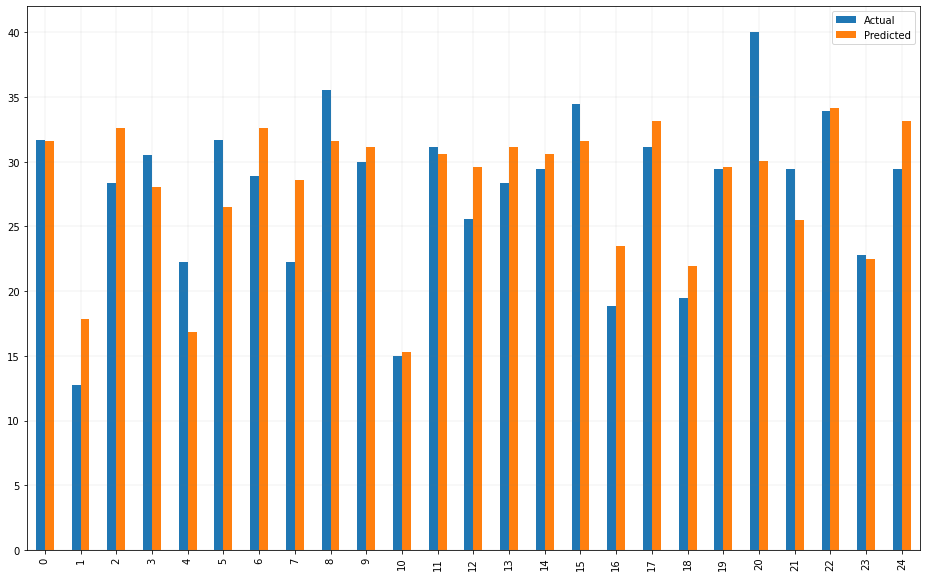

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 3.1744838160702313
Mean Squared Error: 17.277988157372207
Root Mean Squared Error: 4.156679944062594


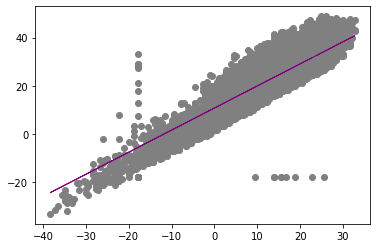

In [21]:
plt.scatter(x_test, y_test,  color='grey')
plt.plot(x_test, y_pred_lr, color='purple', linewidth=1)
plt.show()

In [22]:
lr_model=sf.OLS(endog=y_train,exog=x_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.675e+06
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        06:54:55   Log-Likelihood:                     -2.7004e+05
No. Observations:               83328   AIC:                                  5.401e+05
Df Residuals:                   83327   BIC:                                  5.401e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4118      0.001   1294.354      0.000       1.410       1.414
==============================================================================
Omnibus:                    11317.203   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25366.673
Skew:                           0.811   Prob(JB):                         0.00
Kurtosis:                       5.162   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

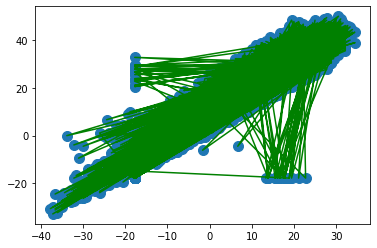

In [23]:
import operator
plt.scatter(x_train, y_train, s=100)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_lr), key=sort_axis)
x_test, y_pred_lr = zip(*sorted_zip)
plt.plot(x_train, y_train, color='g')
plt.show()

# POLYNOMIAL REGRESSION

In [24]:
poly=PolynomialFeatures(degree=4)
poly_df=poly.fit_transform(x_train)
lin=LinearRegression()
lin.fit(poly_df,y_train)

LinearRegression()

In [25]:
y_pred_poly=lin.predict(poly_df)

In [26]:
print(r2_score(y_train,y_pred_poly))

0.7967273698904817


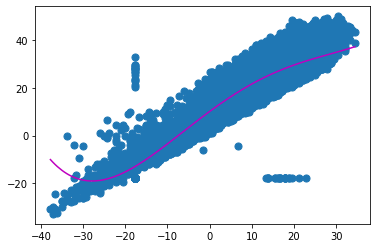

In [27]:
plt.scatter(x_train, y_train, s=50)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_poly), key=sort_axis)
x_train,y_pred_poly= zip(*sorted_zip)
plt.plot(x_train,y_pred_poly, color='m')
plt.show()

# XGBOOST REGRESSION

In [28]:
xgb= XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [29]:
y_pred_xgb=xgb.predict(x_test)

In [30]:
print(r2_score(y_test,y_pred_xgb))

-0.0013987502040049282


In [31]:
y_train_hat = xgb.predict(x_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_hat)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
print (train_r2, train_rmse, y_train.mean(), y_train_hat.mean())

0.001459675948380812 8.720239879325174 27.028669834856075 27.026669


# DECISION TREE REGRESSION

In [32]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred_dt=dt.predict(x_train)

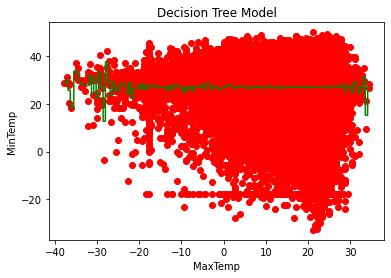

In [45]:
plt.scatter(x_train,y_train, color="red")
X_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt.predict(X_grid),color="g")
plt.xlabel("MaxTemp")
plt.ylabel("MinTemp")
plt.title("Decision Tree Model")
plt.show()

In [38]:
print(r2_score(y_train,y_pred_dt))

0.0014868814934215768


# RANDOM FOREST REGRESSION

In [39]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_pred_rf=rf.predict(x_train)

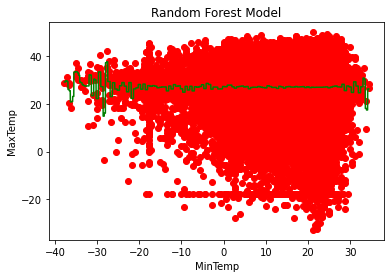

In [44]:
plt.scatter(x_train,y_train, color="red")
X_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf.predict(X_grid),color="g")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.title("Random Forest Model")
plt.show()

In [46]:
print(r2_score(y_train,y_pred_rf))

0.0014700910578593351


# DEEP NEURAL NETWORK

In [47]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [48]:
x_train,x_test, y_train, y_test = train_test_split(x_std,y, train_size=0.7,random_state=101)

In [49]:
DNN = tf.keras.models.Sequential()
DNN.add(tf.keras.layers.Dense(units=10, activation = 'relu'))
DNN.add(tf.keras.layers.Dense(units=10, activation = 'relu'))
DNN.add(tf.keras.layers.Dense(units=1))
DNN.compile(optimizer='adam', loss='mean_squared_error')
DNN.fit(x_train, y_train, batch_size=32, epochs = 100)

2022-07-22 07:00:31.215264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 07:00:31.216672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 07:00:31.217373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 07:00:31.218164: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100
2604/2604 [==============================] - 5s 2ms/step - loss: 105.4472
Epoch 2/100
2604/2604 [==============================] - 4s 1ms/step - loss: 15.0127
Epoch 3/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.9846
Epoch 4/100
2604/2604 [==============================] - 4s 2ms/step - loss: 14.9735
Epoch 5/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.9488
Epoch 6/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.9317
Epoch 7/100
2604/2604 [==============================] - 4s 2ms/step - loss: 14.9345
Epoch 8/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.9138
Epoch 9/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.8999
Epoch 10/100
2604/2604 [==============================] - 4s 2ms/step - loss: 14.8880
Epoch 11/100
2604/2604 [==============================] - 4s 1ms/step - loss: 14.8794
Epoch 12/100
2604/2604 [==============================] - 4s 1

In [50]:
y_pred_DNN=DNN.predict(x_test)

In [51]:
print(r2_score(y_test,y_pred_DNN))

0.8016471764318651
